In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [46]:
# Load the data
df = pd.read_csv("Student_performance_data .csv")

# Features and target
X = df.drop(['GradeClass', 'StudentID'], axis=1)
y = df['GradeClass']

# Encode target labels (e.g. A, B, C → 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# If it's multi-class, convert to one-hot
y_categorical = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [47]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')  # softmax for multiclass classification
])


c:\Users\kyles\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2618 - loss: 1.6175 - val_accuracy: 0.4935 - val_loss: 1.2526
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5671 - loss: 1.2173 - val_accuracy: 0.5535 - val_loss: 1.0598
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 1.0200 - val_accuracy: 0.6110 - val_loss: 0.9734
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - loss: 0.9723 - val_accuracy: 0.6501 - val_loss: 0.9355
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 0.8806 - val_accuracy: 0.6632 - val_loss: 0.9144
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.8416 - val_accuracy: 0.6841 - val_loss: 0.8980
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 0.9037 - val_accuracy: 0.6997 - val_loss: 0.8817
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.9091 - val_accuracy: 0.7232 - val_loss:

In [50]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Ensure that label_encoder.classes_ contains valid labels and convert to string
class_labels = [str(label) for label in label_encoder.classes_]

# Proceed with the classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8046 - loss: 0.6379 
Test Accuracy: 82.25%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.14      0.23        22
         1.0       0.61      0.76      0.67        49
         2.0       0.80      0.74      0.77        85
         3.0       0.77      0.74      0.76        86
         4.0       0.90      0.96      0.93       237

    accuracy                           0.82       479
   macro avg       0.77      0.67      0.67       479
weighted avg       0.82      0.82      0.81       479



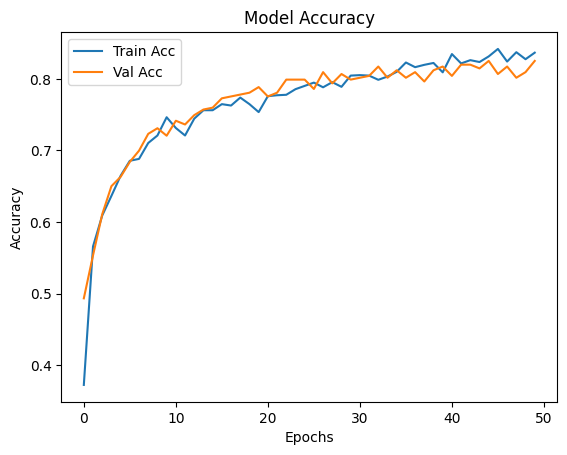

In [51]:


plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()